In [1]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

### Loading the data.

In [2]:
(x_train_before_split,y_train_before_split),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()
x_train_before_split.shape #Since there are 50,000(training data) images for pixel size 32x32 and because of three colours R-G-B we have ....
#thickness of layer as 3.

(50000, 32, 32, 3)

In [3]:
x_test.shape #10,000 testing data images.

(10000, 32, 32, 3)

In [4]:
y_test.shape #Only has one output.

(10000, 1)

In [5]:
y_train_before_split[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

### Flattening the outputs to one dimensional array.

In [6]:
y_train_before_split = y_train_before_split.reshape(-1,)
y_train_before_split[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_train_before_split.shape

(50000,)

In [8]:
y_test=y_test.reshape(-1,)
y_test.shape

(10000,)

In [9]:
x_train_before_split = x_train_before_split/255.00
x_test = x_test/255.00
x_train_before_split

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

### Just to make sure the data given is completly randomized we randomize the data.

#### Since this can happen that out of the 50,000 training data, The first 5,000 is of 'cat' alone and let's say our batch size is less than that, ex. 100, then it will only focus on the cases of cat and will fail miserably for the validation test.

In [10]:
num_train_data = int(x_train_before_split.shape[0])
num_train_data

50000

In [11]:
shuffled_indices = np.arange(num_train_data)
np.random.shuffle(shuffled_indices)

shuffled_indices #As we can see below the indices are is completely randomized.
#Now will rearrange or rather I should shuffle the x-train and y-train in same order so that the output for the input is same

array([11163, 19726,  1093, ..., 43018, 16822, 40175])

In [12]:
shuffled_x_train=x_train_before_split[shuffled_indices]
shuffled_y_train=y_train_before_split[shuffled_indices]

shuffled_x_train.shape

(50000, 32, 32, 3)

### breaking the train data set with 50,000 data to train(40,000) and validation(10,000) data.

In [13]:
#splitting into training sample and...

num_new_training_sample = int(0.8*num_train_data)
x_train=shuffled_x_train[:num_new_training_sample]
y_train=shuffled_y_train[:num_new_training_sample]

#the rest as validation data...
x_validation=shuffled_x_train[num_new_training_sample:]
y_validation=shuffled_y_train[num_new_training_sample:]

x_validation.shape

(10000, 32, 32, 3)

In [14]:
x_train.shape

(40000, 32, 32, 3)

## Examining data.

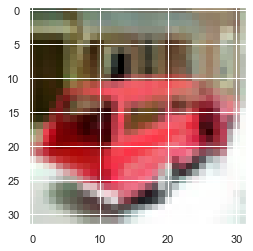

In [15]:
plt.imshow(x_train[0]) #Printing data just to see how is the data like.

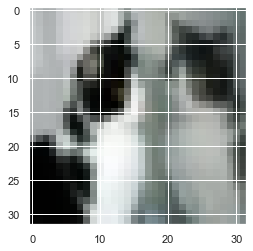

In [16]:
plt.imshow(x_train[1])

### Picking up the list of classes in order to correct matching index from the official website.

In [17]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'] #inorder.

In [18]:
def plot_sample(x,y,index): #where index is which element from the data set we are trying look.
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

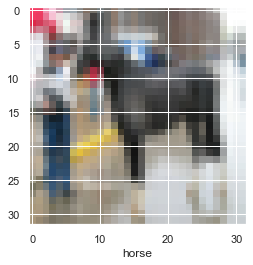

In [19]:
plot_sample(x_train,y_train,5)

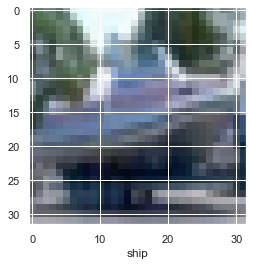

In [20]:
plot_sample(x_train,y_train,556)

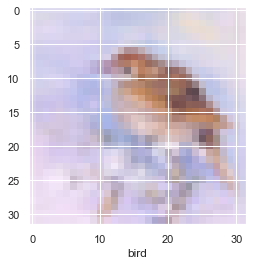

In [21]:
plot_sample(x_train,y_train,9000)

## Model

In [22]:
input_size = 32*32*3
output_size = 10 #Since we want the output to be classified into 10.

model = tf.keras.Sequential([
                            tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
                            tf.keras.layers.MaxPooling2D((2,2)), #This is the first hidden layer.
                            #using 32 filters for the first hidden layer.
                            
                            tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                            tf.keras.layers.MaxPooling2D((2,2)), #This is the second hidden layer.
                            #using 64 filters for the second hidden layer.
    
                            tf.keras.layers.Conv2D(filters=96,kernel_size=(3,3),activation='relu'),
                            tf.keras.layers.MaxPooling2D((2,2)), #This is the second hidden layer.
                            #using 96 filters for the second hidden layer.
                            
                            tf.keras.layers.Flatten(), #The values and all will be intact of the 3rd layer hidden layer
                            tf.keras.layers.Dense(output_size,activation='softmax') #This is the final output layer that...
                            #our model will predict.
                            
                            ]) #Notice for the activation we ues softmax, Since we want to give probality.

In [23]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 96)          55392     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 96)          0

In [25]:
NUM_EPOCHS = 50
BATCH_SIZE = 200
#The above are our hyperparamters and we will tune it according to our analysis.


early_stopping = tf.keras.callbacks.EarlyStopping() #Will instantly stop the process if it detects a increase in validation_acc

history = model.fit(x_train,
                    y_train, 
                    epochs=NUM_EPOCHS,
                    validation_data=(x_validation,y_validation),
                    callbacks = [early_stopping],
                    verbose=2)

Epoch 1/50
1250/1250 - 23s - loss: 1.6443 - accuracy: 0.3974 - val_loss: 1.4141 - val_accuracy: 0.4855 - 23s/epoch - 18ms/step
Epoch 2/50
1250/1250 - 21s - loss: 1.2924 - accuracy: 0.5413 - val_loss: 1.2409 - val_accuracy: 0.5668 - 21s/epoch - 17ms/step
Epoch 3/50
1250/1250 - 19s - loss: 1.1386 - accuracy: 0.5992 - val_loss: 1.1211 - val_accuracy: 0.6036 - 19s/epoch - 15ms/step
Epoch 4/50
1250/1250 - 20s - loss: 1.0470 - accuracy: 0.6327 - val_loss: 1.1093 - val_accuracy: 0.6108 - 20s/epoch - 16ms/step
Epoch 5/50
1250/1250 - 20s - loss: 0.9794 - accuracy: 0.6594 - val_loss: 1.0266 - val_accuracy: 0.6407 - 20s/epoch - 16ms/step
Epoch 6/50
1250/1250 - 20s - loss: 0.9119 - accuracy: 0.6851 - val_loss: 1.0050 - val_accuracy: 0.6506 - 20s/epoch - 16ms/step
Epoch 7/50
1250/1250 - 20s - loss: 0.8620 - accuracy: 0.6980 - val_loss: 0.9788 - val_accuracy: 0.6595 - 20s/epoch - 16ms/step
Epoch 8/50
1250/1250 - 20s - loss: 0.8141 - accuracy: 0.7171 - val_loss: 0.9967 - val_accuracy: 0.6560 - 20s/ep

In [26]:
history.history??
#This is will CLUTCH. Will show what type of attributes does it hold. then we can print them accordingly.

Text(0.5, 1.0, 'Loss vs Epochs')

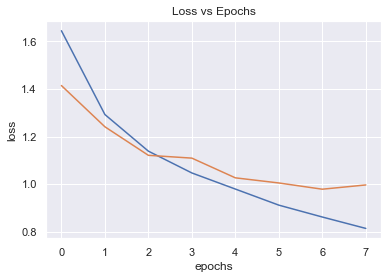

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss vs Epochs')

In [28]:
print("Training accuracy : " + str(history.history['accuracy'][3]*100.00)+'%')
print("Validation accuracy : " + str(history.history['val_accuracy'][3]*100.00)+'%')

Training accuracy : 63.27250003814697%
Validation accuracy : 61.080002784729004%


Text(0.5, 1.0, 'Accuracy vs Epochs')

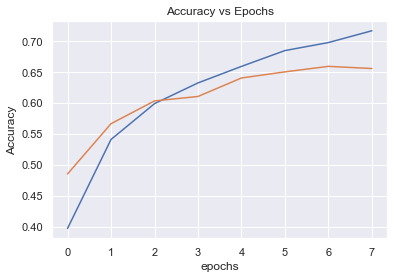

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')

### Testing the model

In [30]:
test_loss, test_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9957 - accuracy: 0.6568


In [31]:
test_loss

0.9956885576248169

In [39]:
print("Test accuracy : " +str(test_acc*100.00))
print("Validation accuracy : " +str(history.history['val_accuracy'][3]*100.00))

Test accuracy : 65.67999720573425
Validation accuracy : 61.080002784729004


### The fact that we recieved high test accuracy as compared to validation data, says that our model is not overfittign wrt. the validation data but there is a slight overfitting with the training data.

In [40]:
y_prediction = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [41]:
y_prediction[2] #This will spit out the probablity of the image at index '2' of the test set.

array([1.7571424e-01, 5.9915334e-02, 2.7419652e-03, 1.3161489e-03,
       1.4237872e-03, 1.5884699e-04, 4.6762452e-04, 6.3309039e-04,
       7.3101366e-01, 2.6615378e-02], dtype=float32)

In [42]:
y_prediction = [np.argmax(arr) for arr in y_prediction] #argmax() will return the index of the element inside the list with...
#maximum value. Basicly it's prediction but hardmax.
#So, this matrix will hold the prediction number out of 10.
y_prediction

[6,
 8,
 8,
 8,
 6,
 6,
 9,
 6,
 3,
 1,
 0,
 9,
 5,
 7,
 9,
 6,
 5,
 7,
 8,
 6,
 7,
 2,
 4,
 9,
 2,
 2,
 4,
 2,
 9,
 6,
 6,
 5,
 4,
 5,
 9,
 6,
 4,
 1,
 9,
 5,
 0,
 6,
 5,
 6,
 8,
 9,
 3,
 9,
 7,
 6,
 9,
 0,
 6,
 6,
 8,
 8,
 7,
 6,
 6,
 6,
 7,
 5,
 6,
 2,
 6,
 6,
 1,
 2,
 5,
 9,
 2,
 6,
 8,
 8,
 0,
 2,
 0,
 3,
 3,
 8,
 8,
 1,
 1,
 7,
 2,
 7,
 0,
 8,
 9,
 9,
 0,
 6,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 7,
 4,
 5,
 6,
 6,
 1,
 1,
 8,
 6,
 7,
 5,
 4,
 0,
 2,
 2,
 1,
 5,
 0,
 4,
 6,
 3,
 0,
 3,
 1,
 2,
 8,
 0,
 2,
 3,
 3,
 0,
 4,
 1,
 8,
 9,
 1,
 2,
 9,
 7,
 2,
 8,
 6,
 5,
 6,
 5,
 8,
 2,
 6,
 6,
 5,
 5,
 8,
 9,
 6,
 1,
 0,
 6,
 2,
 9,
 5,
 4,
 2,
 1,
 6,
 6,
 0,
 2,
 8,
 6,
 9,
 0,
 9,
 6,
 1,
 8,
 1,
 9,
 3,
 6,
 3,
 0,
 6,
 5,
 6,
 2,
 5,
 8,
 6,
 2,
 6,
 8,
 5,
 8,
 0,
 1,
 7,
 6,
 8,
 5,
 5,
 8,
 5,
 9,
 8,
 7,
 1,
 3,
 0,
 5,
 7,
 9,
 6,
 9,
 5,
 7,
 8,
 0,
 0,
 9,
 0,
 7,
 7,
 3,
 9,
 5,
 4,
 9,
 4,
 2,
 5,
 2,
 5,
 1,
 5,
 8,
 8,
 0,
 4,
 0,
 5,
 6,
 1,
 1,
 8,
 9,
 0,
 6,
 1,
 8,
 2,
 0,


In [43]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [44]:
plt.figure(figsize=(14,7),annot=True)
sns.heatmap(confusion_matrix(y_test,y_prediction))
plt.xlabel('Prediction')
plt.ylabel('True')

AttributeError: 'Figure' object has no property 'annot'